In [2]:
# DataSpark Illuminating Insights for Global Electronics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Customer file processing
with open("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Customers.csv") as f:
    print(f)
    
#Load Customer Raw dataset
raw_cust_data=pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Customers.csv",encoding = 'cp1252')

raw_cust_data.head()

#EDA for Customer file
raw_cust_data.info()
raw_cust_data.describe(include='all')
raw_cust_data.nunique()
raw_cust_data.isnull().sum()

#Checking Unique value for each column
for i in raw_cust_data.columns:
    print(i,":",raw_cust_data[i].nunique())

#Identifying Null Records
raw_cust_data.loc[raw_cust_data["State Code"].isnull()]

#It is observed that State Code has NULL values. Fixing Null value.
raw_cust_data['State Code'].fillna('Unknown',inplace=True)

#Validating the Null Fix
raw_cust_data.iloc[5304]
raw_cust_data
#Calculating percentage NULL value for each value after fillna
(raw_cust_data.isnull().sum()/raw_cust_data.shape[0])*100

In [13]:
#Correcting datatype for Birthday field
raw_cust_data['Birthday']= pd.to_datetime(raw_cust_data['Birthday'],errors='coerce')

In [ ]:
#Validating the datatype conversion
raw_cust_data.info()

In [15]:
raw_cust_data['Age']=(pd.Timestamp.now()-raw_cust_data['Birthday']).dt.total_seconds()/(60*60*24*365.25)
raw_cust_data['Age']=raw_cust_data['Age'].astype(int)
raw_cust_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Dušková,Houston,TX,Texas,77017,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,86
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,87


In [16]:
# Checking for Duplicates
raw_cust_data.loc[raw_cust_data.duplicated()]
#Cleansed Data
raw_cust_data.to_csv('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Customers.csv', index=False)
print("Customer data cleansed successfully")

Customer data cleansed successfully


In [ ]:
#Data Visualization for Cleansed Customer File
clean_cust_data=pd.read_csv('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Customers.csv')
plt.figure(figsize=(15,8))
#1. Age Distribution of the Customer
plt.subplot(3,2,1)
sns.histplot(clean_cust_data['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#2. Gender Distribution
plt.subplot(3,2,1)
sns.countplot(data=clean_cust_data,x='Gender')
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

#3. Top 10 City Distribution
plt.subplot(3,2,1)
sns.countplot(data=clean_cust_data,y='City', order=clean_cust_data['City'].value_counts().index[:10])
plt.title('Customer City Distribution')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.show()

#4. Least State Distribution
plt.subplot(3,2,1)
sns.countplot(data=clean_cust_data,y='State', order=clean_cust_data['State'].value_counts().index[-10:])
plt.title('Customer State Distribution')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

#5. Age By Gender Distribution
plt.subplot(3,2,1)
sns.boxplot(data=clean_cust_data,x='Gender',y='Age')
plt.title('Age by Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

#Additional plot
sns.pairplot(data=clean_cust_data, hue='Country')

In [ ]:
# Products file processing
with open('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Products.csv') as f:
    print(f)

# Load Product Raw dataset
raw_prod_data=pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Products.csv",encoding = 'cp1252')

#EDA for Products
raw_prod_data.info()
raw_prod_data.describe(include='all')

for i in raw_prod_data.columns:
    print(i,':',raw_prod_data[i].nunique())

#Calculating percentage NULL value 
(raw_prod_data.isnull().sum()/raw_prod_data.shape[0])*100

#Duplicate check
raw_prod_data.loc[raw_prod_data.duplicated()]

#Removes Dollar Symbol and Datatype Conversion 
for columns in raw_prod_data[["Unit Cost USD","Unit Price USD"]]:
    raw_prod_data[columns]=raw_prod_data[columns].str.replace('$','')
    raw_prod_data[columns]=raw_prod_data[columns].str.replace(',','')

for columns in raw_prod_data[["Unit Cost USD","Unit Price USD"]]:
    raw_prod_data[columns]=raw_prod_data[columns].astype(float)

print((raw_prod_data.isnull().sum()/raw_prod_data.shape[0])*100)

In [33]:
raw_prod_data.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Products.csv",index=False)
print('Products Data cleansed successfully')

Products Data cleansed successfully


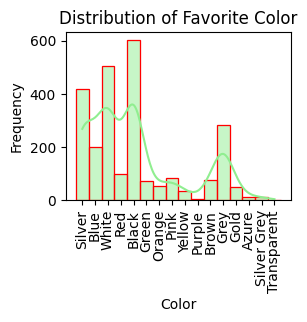

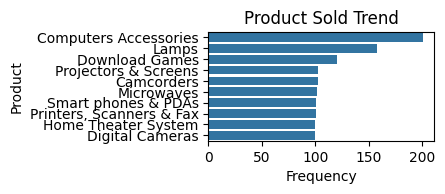

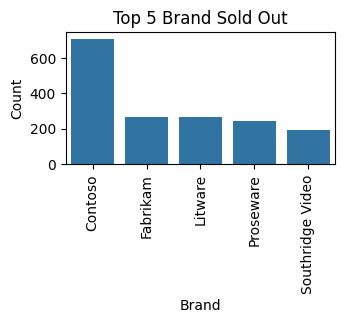

In [34]:
#Data Visualization for Cleansed Product File
clean_prod_data=pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Products.csv")

# 1. Distribution of Favorite Color
plt.subplot(2, 2, 3)
sns.histplot(clean_prod_data['Color'].dropna(), bins=20, kde=True,color='lightgreen', edgecolor='red')
plt.title('Distribution of Favorite Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.show() 

#2. Top 10 product sold
plt.subplot(3,2,1)
sns.countplot(data=clean_prod_data,y='Subcategory', order=clean_prod_data['Subcategory'].value_counts().index[:10])
plt.title('Product Sold Trend')
plt.xlabel('Frequency')
plt.ylabel('Product')
plt.show()

# 3.Top 5 Brand Sold
plt.subplot(2, 2, 3)
sns.countplot(x='Brand', data=clean_prod_data, order=clean_prod_data['Brand'].value_counts().index[:5])
plt.title('Top 5 Brand Sold Out')
plt.ylabel('Count')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Store Data Processing
with open ("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Stores.csv") as f:
    print(f)

raw_store_data=pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Stores.csv",encoding='cp1252')

# EDA for Raw Store Data
raw_store_data.info()
raw_store_data.describe(include='all')

for i in raw_store_data.columns:
    print(i,':',raw_store_data[i].nunique())

#Calculating NULL existence
(raw_store_data.isnull().sum()/raw_store_data.shape[0])*100

#Duplicate Check
raw_store_data.loc[raw_store_data.duplicated()]

#Datatype conversion for Open Date
raw_store_data['Open Date']=pd.to_datetime(raw_store_data['Open Date'],errors='coerce')

raw_store_data.info()

In [ ]:
raw_store_data.loc[raw_store_data['Square Meters'].isnull()]

#Fixing NULL for Square Meters
raw_store_data['Square Meters'].fillna(0,inplace=True)

In [39]:
# Save cleaned dataset
raw_store_data.to_csv('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Stores.csv', index=False)

print("Stores data cleaning completed.")

Stores data cleaning completed.


In [ ]:
# Sales Data Preprocessing
with open('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Sales.csv') as f:
    print(f)
raw_sales_data=pd.read_csv('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Sales.csv',encoding='cp1251')

#EDA for Sales Data
raw_sales_data.info()
raw_sales_data.describe(include='all')

#Missing Value Check
(raw_sales_data.isnull().sum()/raw_sales_data.shape[0])/100

#Datatype Conversion for Delivery Date and Order Date
for columns in raw_sales_data[["Delivery Date","Order Date"]]:
    raw_sales_data[columns]=pd.to_datetime(raw_sales_data[columns],errors='coerce')

raw_sales_data.head()

# NULL value fix
raw_sales_data['Delivery Date'].fillna('0000-01-01 00:00:00',inplace=True)

#Duplicate Check
raw_sales_data.loc[raw_sales_data.duplicated()]

raw_sales_data.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Sales.csv",index=False)
print('Sales Data cleansed successfully')

In [4]:
clean_sales_data=pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Sales.csv")
(clean_sales_data.isnull().sum()/clean_sales_data.shape[0])*100
clean_sales_data["Order Date"]=pd.to_datetime(clean_sales_data["Order Date"], errors='coerce')
clean_sales_data['Order Date'].groupby(clean_sales_data['Order Date'].dt.to_period('M')).count()

Order Date
2016-01    666
2016-02    815
2016-03    279
2016-04    106
2016-05    501
          ... 
2020-10    338
2020-11    356
2020-12    761
2021-01    617
2021-02    595
Freq: M, Name: Order Date, Length: 62, dtype: int64

In [ ]:
#Data Visualization for Cleansed Sales Data

#1. Total Sales Over Time
plt.figure(figsize=(10, 6))
if 'Order Date' in clean_sales_data.columns:
    clean_sales_data['Order Date'].groupby(clean_sales_data['Order Date'].dt.to_period('M')).count().plot()
    plt.title('Sales Count Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Count')
else:
    print("Column 'Order Date' is not present in the cleaned dataset.")
plt.show()

#2. Sales By Product
plt.subplot(2,2,2)
sns.countplot(data=clean_sales_data,y='ProductKey',order=clean_sales_data['ProductKey'].value_counts().index[:10])
plt.title('Top 10 Sales By Product')
plt.xlabel('Frequency')
plt.ylabel('ProductKey')
plt.show()

#3. Sales By Store
plt.subplot(2,2,2)
sns.countplot(data=clean_sales_data,x='StoreKey',order=clean_sales_data['StoreKey'].value_counts().index[:10])
plt.title('Top 10 Sales By Store')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.xlabel('StoreKey')
plt.show()

#4. Quantity Distribution (Cleaned Data)
plt.subplot(2, 2, 1)
sns.histplot(clean_sales_data['Quantity'].dropna(), bins=20, kde=True)
plt.title('Quantity Distribution (Cleaned Data)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()



In [ ]:
#Exchange Data Preprocessing
with open("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Exchange_Rates.csv") as f:
    print(f)

raw_exchng_data=pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Exchange_Rates.csv")

#EDA for Exchange Data
raw_exchng_data.info()
raw_exchng_data.describe(include='all')

raw_exchng_data['Date']= pd.to_datetime(raw_exchng_data['Date'],errors='coerce')

(raw_exchng_data.isnull().sum()/raw_exchng_data.shape[0])/100
raw_exchng_data.loc[raw_exchng_data.duplicated()]
raw_exchng_data.drop_duplicates(inplace=True)

# Save cleaned dataset
raw_exchng_data.to_csv('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Exchange_Rates.csv', index=False)

print("Exchange rates data cleaning completed.")


In [ ]:
# Load cleaned dataset (if you want to reload it from the saved file, otherwise use the 'exchange_rates' DataFrame directly)
clean_exchng_rates = pd.read_csv('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Exchange_Rates.csv')

# EDA on Cleaned Data
print("EDA on Cleaned Data")
print(clean_exchng_rates.info())
print(clean_exchng_rates.head())
print(clean_exchng_rates.describe(include='all'))
print(clean_exchng_rates.isnull().sum())

In [ ]:
#Merging Data 
import pandas as pd

# Load cleaned datasets
customers = pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Customers.csv")
sales = pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Sales.csv")
stores = pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Stores.csv")
products = pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Products.csv")
exchange_rates = pd.read_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Exchange_Rates.csv")

# Merge sales with customers
sales_customers = pd.merge(sales, customers, how='left', on='CustomerKey')

# Merge sales_customers with stores
sales_customers_stores = pd.merge(sales_customers, stores, how='left', left_on='StoreKey', right_on='StoreKey')

# Merge sales_customers_stores with products
sales_customers_stores_products = pd.merge(sales_customers_stores, products, how='left', left_on='ProductKey', right_on='ProductKey')

# Merge with exchange rates if needed (e.g., if there are columns that need exchange rates)
sales_customers_stores_products_exchange = pd.merge(sales_customers_stores_products, exchange_rates, how='left', left_on=['Order Date','Currency Code'], right_on=['Date','Currency'])

# Save the merged dataset
sales_customers_stores_products_exchange.to_csv('C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Merged_Sales_Data_Exchange.csv', index=False)

print("Data merging completed.")

In [ ]:
#SQLLite3 Insert
import sqlite3
import pandas as pd

# Paths to the cleaned datasets
customers_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Customers.csv'
sales_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Sales.csv'
stores_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Stores.csv'
products_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Products.csv'
exchange_rates_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Cleansed_Exchange_Rates.csv'
merged_data_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Merged_Sales_Data_Exchange.csv'

# Path to the SQLite database
db_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Data_Spark.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Load each dataset
customers = pd.read_csv(customers_path)
sales = pd.read_csv(sales_path)
stores = pd.read_csv(stores_path)
products = pd.read_csv(products_path)
exchange_rates = pd.read_csv(exchange_rates_path)
merged_data = pd.read_csv(merged_data_path)

# Insert each DataFrame into the SQLite database
customers.to_sql('Customers', conn, if_exists='replace', index=False)
sales.to_sql('Sales', conn, if_exists='replace', index=False)
stores.to_sql('Stores', conn, if_exists='replace', index=False)
products.to_sql('Products', conn, if_exists='replace', index=False)
exchange_rates.to_sql('ExchangeRates', conn, if_exists='replace', index=False)
merged_data.to_sql('MergedData', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print("All datasets successfully stored in the SQLite database.")

In [ ]:
#Customer Table Queries
import sqlite3

# Path to the SQLite database
db_path = 'C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Data_Spark.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

cur = conn.cursor()

cur.execute("SELECT Gender, COUNT(*) AS Total_Customers, AVG(Age) AS Average_Age, City,State_x AS State,Country_x AS Country, Continent FROM MergedData GROUP BY Gender, City, State_x, Country_x, Continent ORDER BY Total_Customers DESC;")
rows = cur.fetchall()
df1=pd.DataFrame(rows,columns=["Gender","TotalCustomers","AverageAge","City","State","Country","Continent"])
df1.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\demographics.csv",index=False)

cur.execute("SELECT CustomerKey as CustomerKey, COUNT(DISTINCT [Order Number]) AS Purchase_Frequency, AVG(SUM([Unit Price USD] * Quantity * Exchange)) OVER (PARTITION BY CustomerKey) AS Average_Order_Value, GROUP_CONCAT(DISTINCT [Product Name]) AS Preferred_Products FROM MergedData GROUP BY CustomerKey;")
rows = cur.fetchall()
df2=pd.DataFrame(rows,columns=["CustomerKey","Purchase_Frequency","Average_Order_Value","Preferred_Products"])
df2.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\preffered_purchase.csv",index=False)

cur.execute("with ageSpread as (select CustomerKey, Avg(Age) as AverageAge, SUM([Unit Price USD] * Quantity * Exchange) as TotalSpend from MergedData Group by CustomerKey) SELECT CASE WHEN AverageAge < 25 THEN 'Under 25' WHEN AverageAge BETWEEN 25 AND 40 THEN '25-40' WHEN AverageAge BETWEEN 41 AND 60 THEN '41-60' ELSE 'Above 60' END AS AgeSegment, CASE WHEN TotalSpend < 100 THEN 'Low Spend' WHEN TotalSpend BETWEEN 100 AND 500 THEN 'Medium Spend' ELSE 'High Spend' END AS SpendSegment, COUNT(*) AS CustomerSpread FROM ageSpread GROUP BY AgeSegment, SpendSegment;")
rows = cur.fetchall()
df3=pd.DataFrame(rows,columns=["AgeSpend","TotalSpend","CustomerSpread"])
df3.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\Customer_Segmentation.csv",index=False)

cur.execute("select strftime('%m', [Order Date]) AS Month,strftime('%Y', [Order Date]) AS Year,Sum([Unit Price USD]* Quantity) AS Total_Sales from MergedData group by Year, Month order by Year, Month;")
rows = cur.fetchall()
df4=pd.DataFrame(rows,columns=["Month","Year","Total_Sales"])
df4.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\SalesbyYear.csv",index=False)

cur.execute("SELECT subcategory as Category,[Product Name] As ProductName,Sum(Quantity) as Total_Quantity_Sold,Sum([Unit Price USD]* Quantity) AS Total_Sales from MergedData group by subcategory, [Product Name] order by Total_Quantity_Sold ;")
rows = cur.fetchall()
df5=pd.DataFrame(rows,columns=["Category","ProductName","Total_Quantity_Sold","Total_Sales"])
df5.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\SalesbyProduct.csv",index=False)

cur.execute("SELECT [StoreKey] As StoreKey,Sum(Quantity) as Total_Quantity_Sold,Sum([Unit Price USD]* Quantity) AS Total_Sales from MergedData group by [StoreKey];")
rows=cur.fetchall()
df6=pd.DataFrame(rows, columns=["StoreKey","Total_Quantity_Sold","Total_Sales"])
df6.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\SalesbyStore.csv",index=False)

cur.execute("SELECT [Currency Code] As [Currency Code], SUM([Unit Price USD] * Quantity) AS Total_Sales, AVG([Unit Cost USD]) AS Average_Cost, AVG([Unit Price USD]) AS Average_Price FROM MergedData GROUP BY [Currency Code] ORDER BY Total_Sales DESC;")
rows=cur.fetchall()
df7=pd.DataFrame(rows,columns=["Currency Code","Total Sales","Average Cost","Average Price"])
df7.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\SalesbyCurrency.csv",index=False)

cur.execute("with OrderProduct as (select [Order Number], [Product Name] as ProductA from MergedData where [Line Item]=1), ProductPair as (select [Order Number],[Product Name] as ProductB from MergedData where [Line Item]=2) select A.[Order Number] as OrderNumber,ProductA, ProductB from OrderProduct A left join ProductPair B on A.[Order Number] =B.[Order Number] where A.ProductA !=B.ProductB")
rows=cur.fetchall()
df8=pd.DataFrame(rows,columns=["OrderNUmber","ProductA","ProductB"])
df8.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\CoPurchase.csv",index=False)

cur=execute("WITH CustomerOrders AS (SELECT CustomerKey, MIN([Order Date]) AS FirstPurchase, MAX([Order Date]) AS LastPurchase,COUNT(DISTINCT [Order Number]) AS TotalOrders FROM MergedData GROUP BY CustomerKey) SELECT CustomerKey, FirstPurchase, LastPurchase, TotalOrders, CASE WHEN (julianday('now') - julianday(LastPurchase)) <= 365 THEN 'Active' ELSE 'Inactive' END AS CustomerStatus FROM CustomerOrders;")
rows=fetchall()
df9=pd.DataFrame(rows,columns=['CustomerKey','FirstPurchase','LastPurchase','TotalOrders','CustomerStatus'])
df9.to_csv("C:\\Users\\Percika\\AppData\\Local\\Programs\\Python\\Python310\\New folder\\CustomerRetention.csv",index=False)
